In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np 

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(8, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

history = model.fit(X, y, batch_size=1, epochs=500)
print(model.predict(X))

In [51]:
a = np.array([[1,0]])
model.predict(a)

array([[0.9935486]], dtype=float32)

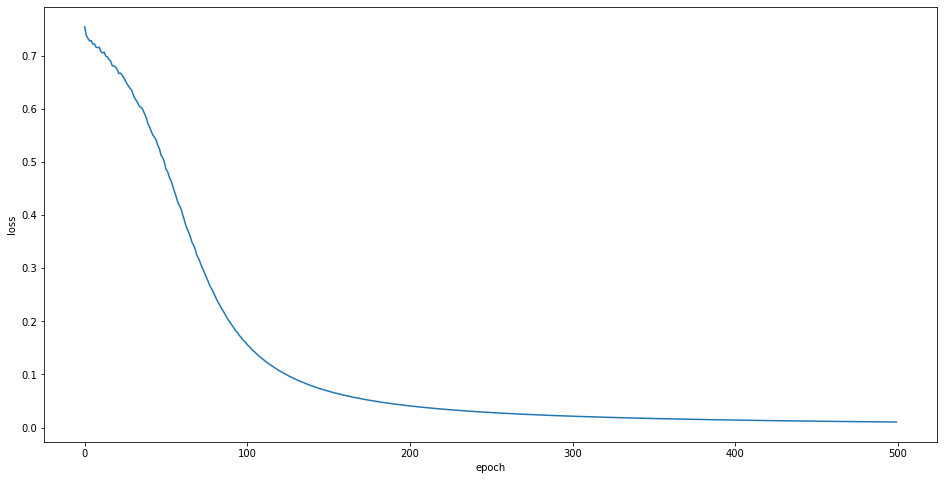

In [59]:
import matplotlib.pyplot as plt

y_loss = history.history['loss']
x = np.arange(len(y_loss))
fig = plt.figure(figsize=(16,8))
plt.plot(x, y_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
fig.savefig('loss graph')

In [0]:
import pandas as pd


In [0]:
data = pd.read_csv('/content/drive/My Drive/ML/data/wisc_bc_data.csv')

In [124]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [0]:
x = data.values

In [126]:
x_data = x[:,2:]
x_data.shape

(569, 30)

In [0]:
data['label'] = data['diagnosis'].map({'B':0, 'M':1})

In [128]:
y_data = data['label'].values
y_data.shape

(569,)

In [0]:
from sklearn.preprocessing import minmax_scale
n_x_data = minmax_scale(x_data) 

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(n_x_data, y_data, test_size = 0.3)

In [0]:
cancer_model = Sequential()
cancer_model.add(Dense(16, input_dim = 30, activation='relu'))
cancer_model.add(Dense(32, activation='relu'))
cancer_model.add(Dense(64, activation='relu'))
cancer_model.add(Dense(16, activation='relu'))
cancer_model.add(Dense(1, activation='sigmoid'))
cancer_model.compile(optimizer = 'adam', loss = 'binary_crossentropy')






In [142]:
y_train = y_train.reshape(-1,1)
y_train.shape
x_train.shape

array([[0],
       [0],
       [0],
       [0],
       [1]])

In [0]:
history = cancer_model.fit(x_train, y_train, epochs=200, batch_size = 32)

In [0]:
y_predict = cancer_model.predict(x_test)

In [0]:
c = y_predict[:,0] < 0.5

In [0]:
y_predict[c] = 0

In [0]:
c = y_predict[:,0] > 0.5
y_predict[c] = 1

In [158]:
y_predict[0:5]

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [161]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predict))

[[103   3]
 [  1  64]]


In [163]:
import collections

collections.Counter(y_test)

Counter({0: 106, 1: 65})

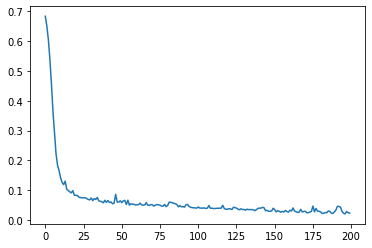

In [153]:
y_loss = history.history['loss']
x_loss = np.arange(len(y_loss))
plt.plot(x_loss,y_loss)

In [116]:
y_test.shape

(171, 1)